# Image Processing Notebook
This notebook will contain image processing techniques documented in the book **Image Processing and Aquisition using Python** by **Ravishankar Chityala**

### Imports

In [545]:
import numpy as np
from scipy import ndimage, misc
from scipy.misc.pilutil import Image
from skimage import filters
import matplotlib.pyplot as plt
import cv2

# Chapter 4 Spatial Filters

## Mean Filter
An example of a linear filter is the mean filter. A funciton is linear if it obeys the property, where $f$ is some function
$$
f(x+y) = f(x) + f(y)
$$

### Uses of Mean Filter:
 * Removes noise
 * Enhances quality of image by brightening it
 
### Disadvantages
 * Edges get blurred

In [546]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [547]:
# Initialize the filter as a n x n array; normalize array by number of elements
n = 3
k = np.ones((n, n))/(n*n)

In [548]:
# Perform convolution
meanfiltered_array = scipy.ndimage.filters.convolve(image, k)

In [549]:
# Convert b from an array to an image
meanfiltered = Image.fromarray(meanfiltered_array)

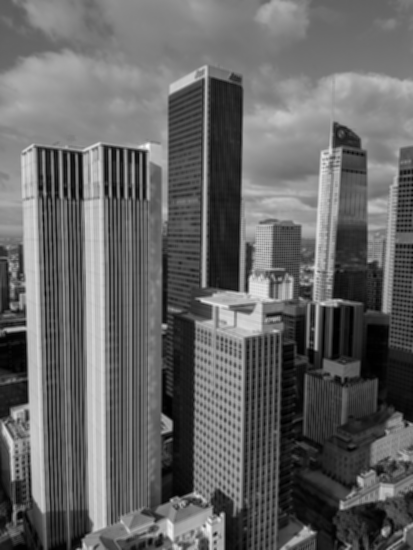

In [550]:
# Save the image
meanfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MeanFilter.png")
meanfiltered

## Median Filter
Functions that do not obey
$$
f(x+y) = f(x) + f(y)
$$
are non-linear. A sliding window is chosen and places on top of the image at position $(i, j)$. All the values under this sliding window are collected and their median is calculated and placed at position $(i, j)$.

### Uses of Median Filter
   * Used to remove salt and pepper noise
   * Removes impulse noise

In [551]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [552]:
# Perform median filter
medianfiltered_array = scipy.ndimage.filters.median_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

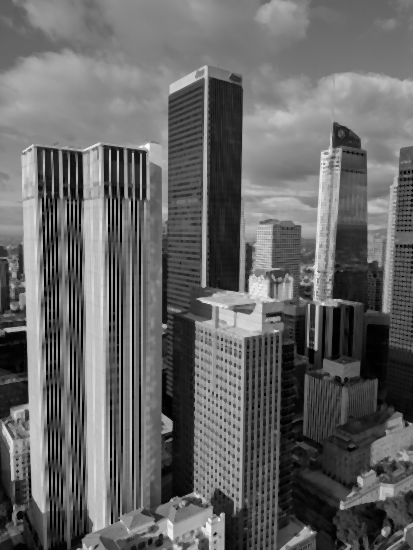

In [553]:
# Convert from array to image
medianfiltered= Image.fromarray(medianfiltered_array)
# Save the image
medianfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MedianFilter.png")
medianfiltered

## Max Filter
The max filter enhances bright points in an image. The maximum values in a sub-image at $(i, j)$

It can be seen in the output image that the buildings have been brightened.

### Uses of Max filter
   * Enhances bright points in an image 

In [554]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [555]:
# Perform the max filter
maxfiltered_array = scipy.ndimage.filters.maximum_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

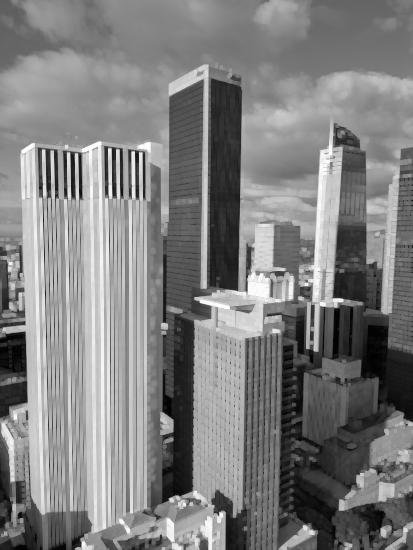

In [556]:
# Convert from array to image
maxfiltered = Image.fromarray(maxfiltered_array)
# Save the image
maxfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MaxFilter.png")
maxfiltered

## Min Filter
The min filter enhances dark points in an image. The minimum value of the sub-image replaces the value at $(i, j)$.


### Uses of Min filter
   * Enhances dark points in an image 

In [557]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [558]:
# Perform the min filter
minfiltered_array = scipy.ndimage.filters.minimum_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

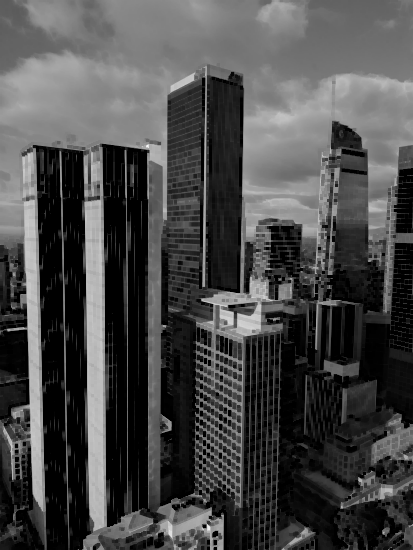

In [559]:
# Convert from array to image
minfiltered = Image.fromarray(minfiltered_array)
# Save the image
minfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MinFilter.png")
minfiltered

## First Derivative Filters
An image is not a continuous function, rather each pixel is a discrete value. To bein talking about derivatives, we will look at the continuous case and extend it to discrete cases. The gradiaent of a coninuous function is given by
$$
\nabla f = \begin{bmatrix}
               f_x \\
               f_y
            \end{bmatrix}
$$
where $f_x = \frac{\partial f}{\partial x}$ which is the change of funciton $f$ with respect to variable $x$-in the horizantal position. The same is with $y$ for the verical direction.

The magnitude of the gradient, or size of the rate of chagne, is a scalar quantity and is given by
$$
\lvert \nabla f \rvert = [ (f_x)^2 + (f_y)^2 ]^{(\frac{1}{2})}
$$

which we can write as 
$$
\lvert \nabla f \rvert = \lvert f_x \rvert + \lvert f_y \rvert
$$
$$
\theta = \arctan \left( \frac{f_y}{f_x} \right)
$$

### Sobel Mask
A popular first derivative filter to find horizantal and vertical edges are given in by for horizantal edges

$$
\begin{bmatrix}
     -1 & -2 & -1 \\
     0 & 0 & 0 \\
     1 & 2 & 1 \\
\end{bmatrix}
$$

and for veritcal edges

$$
\begin{bmatrix}
     -1 & 0 & 1 \\
     -2 & 0 & 2 \\
     -1 & 0 & 1 \\
\end{bmatrix}
$$

#### Important Properties of Sobel Filter
   * Sum of coefficients in the mask is 0. The result of this is that pixels with constant greysacle are not affected by the derivative filter
   * Noise is created
   
### Prewitt Mask

#### Important Properties of Sobel Filter
   * Sum of coefficients in the mask is 0.
   * Filter does not reduce noise

## Sobel Filter

In [560]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


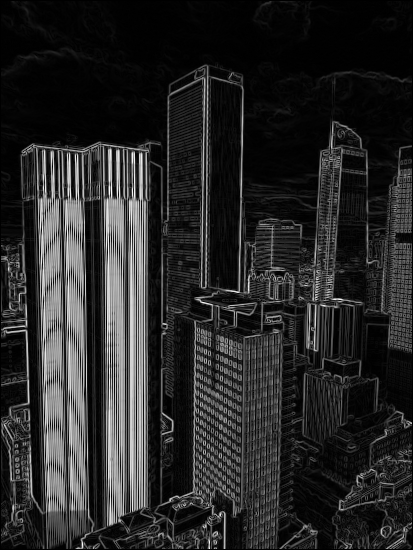

In [561]:
# Performing the Sobel Filter
sobelfiltered_array = filters.sobel(image)

# Convert array to image
# sobelfiltered = Image.fromarray(sobelfiltered_array)
sobelfiltered = misc.toimage(sobelfiltered_array)
sobelfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4SobelFilter.png')
sobelfiltered

## Prewitt Filter

In [562]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


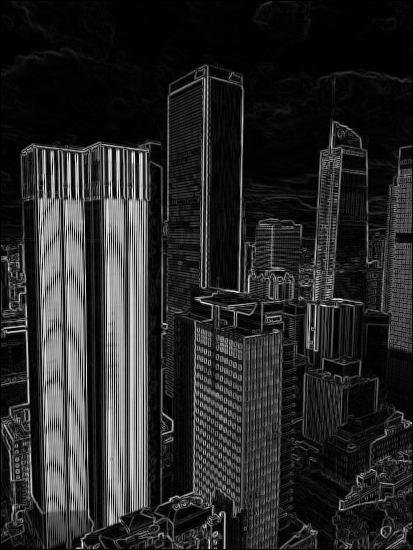

In [563]:
# Performing the Prewitt Filter
# prewittfiltered_array = ndimage.prewitt(image)
prewittfiltered_array = filters.prewitt(image)
# Convert array to image
# prewittfiltered = Image.fromarray(prewittfiltered_array)
prewittfiltered = scipy.misc.toimage(prewittfiltered_array)
prewittfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4PrewittFilter.png')
prewittfiltered